In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import progressbar

ke = 0.75
pebar = 32
sigmae = 0.5
kg = 0.15
pgbar = 40
sigmag = 0.6
dt = 1/365
n = 365*5
pe0 = 20
pg0 = 24
h = 0.40
y = 200*20

rho = 0.5
sd = np.sqrt(dt)
mean = [0,0]
cov = [[sd**2,rho*sd**2],[rho*sd**2,sd**2]]

N = 3000

def simulate(n):
    dw = np.random.multivariate_normal(mean, cov, n)
    dwe = dw[:, 0]
    dwg = dw[:, 1]
    pe = np.array([pe0])
    pg = np.array([pg0])
    for i in range(0,len(dwe)):
        pe = np.append(pe,pe[i]+ke*(pebar-pe[i])*dt+sigmae*pe[i]*dwe[i])
        pg = np.append(pg,pg[i]+kg * (pgbar - pg[i]) * dt + sigmag * pg[i] * dwg[i])
    s = pe - h*pg
    revenue  = y*s
    return revenue

def simulate_one(n):
    dw = np.random.multivariate_normal(mean, cov, n)
    dwe = dw[:, 0]
    dwg = dw[:, 1]
    pe = np.array([pe0])
    pg = np.array([pg0])
    for i in range(0,len(dwe)):
        pe = np.append(pe,pe[i]+ke*(pebar-pe[i])*dt+sigmae*pe[i]*dwe[i])
        pg = np.append(pg,pg[i]+kg * (pgbar - pg[i]) * dt + sigmag * pg[i] * dwg[i])
    return pe, pg

In [2]:
no_day_not_operate = np.array([])
no_day_less = np.array([])
total_revenue = np.array([])
alldata = np.array([])

pbar = progressbar.ProgressBar()
for i in pbar(range(0,N)):
    revenue = simulate(365*5)
    no_day_not_operate = np.append(no_day_not_operate,sum(revenue<0))
    no_day_less = np.append(no_day_less,sum(revenue < 40000))
    total_revenue = np.append(total_revenue,sum(revenue[revenue>0]))

100% |########################################################################|


In [3]:
np.mean(no_day_not_operate)

67.09133333333334

In [4]:
np.mean(no_day_less)

369.163

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bfdc9b0>]],
      dtype=object)

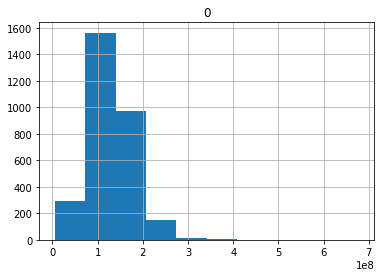

In [5]:
pd.DataFrame(total_revenue).hist()

In [6]:
np.percentile(total_revenue,5)

56916187.00556607

In [7]:
np.percentile(total_revenue,10)

73680628.3224711

# Q.3
## Calculate the price of risk

In [8]:
one_year_pe = np.array([])
one_year_pg = np.array([])

pbar = progressbar.ProgressBar()
for i in pbar(range(0,N)):
    pe, pg = simulate_one(365)
    one_year_pe = np.append(one_year_pe, pe[-1])
    one_year_pg = np.append(one_year_pg, pg[-1])

100% |########################################################################|


In [9]:
fg = 23.5
fe = 26.3
pe = one_year_pe.mean()
pg = one_year_pg.mean()

rg = np.log(pg/fg)
re = np.log(pe/fe)
lambdag = rg/sigmag
lambdae = re/sigmae

K = 40000

In [10]:
print("market price for the gas and electricity are",lambdag,"and",lambdae,"respectively.")

market price for the gas and electricity are 0.1977956912148461 and 0.01748981623875173 respectively.


In [11]:
payoff_2 = np.array([])

pbar = progressbar.ProgressBar()
for i in pbar(range(1,n)):
    revenue_oneday = np.array([])
    for j in range(1,3000):
        pe, pg = simulate_one(i)
        pe = pe[-1]
        pg = pg[-1]
        fg = pg/np.exp(lambdag*sigmag*i*dt)
        fe = pe/np.exp(lambdae*sigmae*i*dt)
        s = fe - h*fg
        revenue  = y*s
        revenue_oneday = np.append(revenue_oneday, revenue)
    payoff_2 = np.append(payoff_2, revenue_oneday.mean())

100% |########################################################################|


In [12]:
payoff_2[payoff_2<0] = 0
payoff_2[payoff_2<K] = K-payoff_2[payoff_2<K]
payoff_2[payoff_2>=K] = 0

In [13]:
print("using the price of risk, the price of the revenue put is", payoff_2.sum())

using the price of risk, the price of the revenue put is 607098.4766713


## simulating the price path to obtain the payoffs of each day's option.

In [14]:
payoff_1 = np.array([])

pbar = progressbar.ProgressBar()
for i in pbar(range(0,N)):
    revenue = simulate(365*5)
    revenue[revenue<0] = 0
    revenue[revenue<K] = K-revenue[revenue<K]
    revenue[revenue>=K] = 0
    payoff_1 = np.append(payoff_1, revenue.sum())

100% |########################################################################|


In [15]:
print("Using 5-year simulation, we have examined whether to execute on each day, the put’s true expected payoff is:", payoff_1.mean())

using 5-year simulation, we have examined whether to execute on each day, the put’s true expected payoff is: 3540100.8468506713


# Q.4

In [16]:
payoff_suboptimal = np.array([])

pbar = progressbar.ProgressBar()
for i in pbar(range(0,N)):
    revenue = simulate(365*5)
    subopt_prob = 0.05*np.exp(-0.7*np.abs(revenue/y))
    revenue[revenue<0] = (revenue*subopt_prob)[revenue<0]
    revenue[revenue>0] = (revenue*(1-subopt_prob))[revenue>0]
    revenue[revenue<0] = 0
    revenue[revenue<K] = K-revenue[revenue<K]
    revenue[revenue>=K] = 0
    payoff_suboptimal = np.append(payoff_suboptimal, revenue.sum())


100% |########################################################################|


In [17]:
print("The payoff for the revenue put is", payoff_suboptimal.mean())

The payoff for the revenue put is 3798799.8507247684
